In [1]:
import utils
import environment
import copy

utils.seed_all(seed = 0)

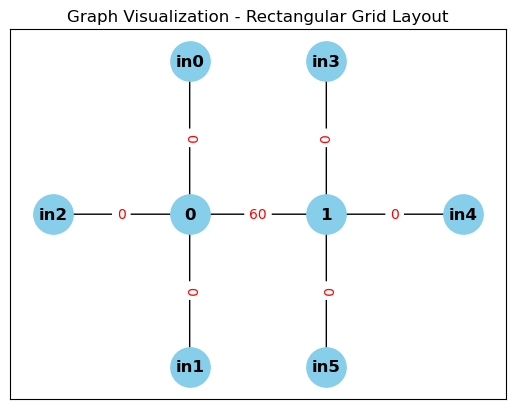

In [2]:
# test env
duration = 300
lanes = ['F', 'L', 'R']
directions = ['N', 'E', 'S', 'W']
A = [(['E', 'W'], ['F']), (['E', 'W'], ['L']), 
    (['N', 'S'], ['F']), (['N', 'S'], ['L']), 
    (['E'], ['F', 'L']), (['W'], ['F', 'L']), 
    (['N'], ['F', 'L']), (['S'], ['F', 'L'])]
vehicle_parameters = {'duration': duration, 'min_speed': 2.22, 'max_speed': 13.33, 
                      'lanes': lanes, 'arrival_rates': {'E': 5/60, 'N': 5/60, 'W': 10/60, 'S': 7/60}}
intersection_parameters = {'duration': duration, 'action_duration': 10, 
                           'Lanes': lanes, 'Directions': directions, 'A': A, 
                           'gamma': 0.95, 'alpha': 0.1, 'espilon': 0.1, 'is_mem_based':False,  
                           'is_dynamic_action_duration': False, 'dynamic_action_duration': 4, 
                           'reward_function': utils.calculate_reward_default, 'n_vehicle_leaving_per_lane': 1}
graph_structure_params = {'rows': 1, 'cols': 2, 'length': 60}
communcation_parameters = {'A': A, 'mu': 0.0, 'sigma': 1.0, 'tau': 0.0}



env_SARSA = environment.Env(duration=duration, update_type= 'partial', comm_based = True, graph_structure_parameters=graph_structure_params, 
          vehicle_parameters=vehicle_parameters, intersection_parameters=intersection_parameters,
          communication_parameters=communcation_parameters)


In [3]:
env_SARSA.SARSA_run(n_episodes=1)


In [4]:
test_graph, test_vehicles = env_SARSA.generate_test_structures(graph_structure_parameters=graph_structure_params, 
                                                               vehicle_parameters=vehicle_parameters, 
                                                               intersection_parameters=intersection_parameters)

In [5]:
test_vehicles_mem = copy.deepcopy(test_vehicles)
test_graph_mem = copy.deepcopy(test_graph)

W: total average weight time per lane: 6.723173832656888s
average weight time per node in s (nan means no cars arrived):
 {'0': 11.853295129226755, '1': 0.7474281465425379}
Total arriving cars: 64


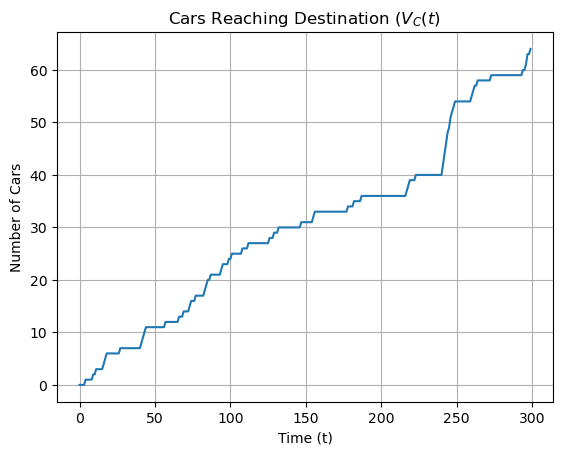

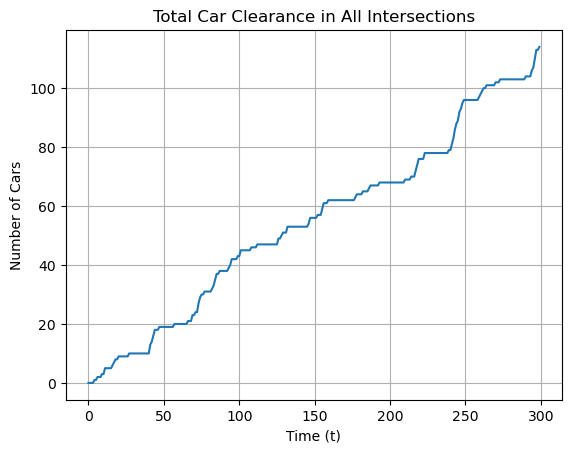

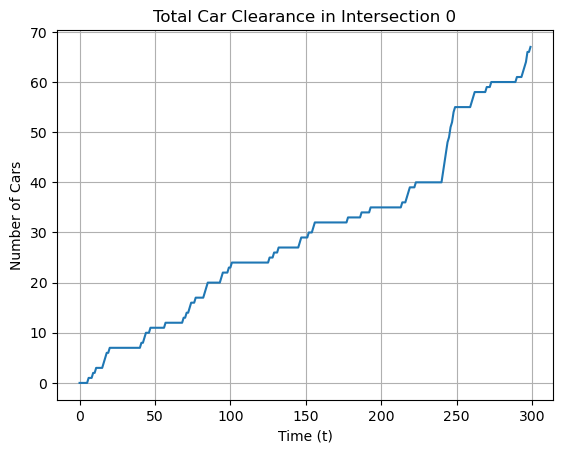

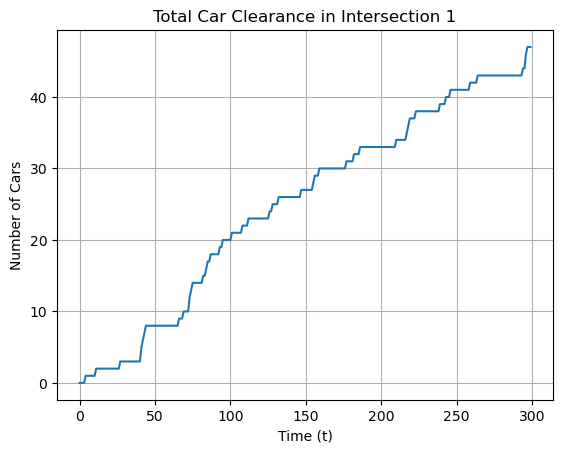

In [6]:
env_SARSA.test(test_graph=test_graph, test_vehicles=test_vehicles, update_epoch = 25)
env_SARSA.display_congestion_metric()

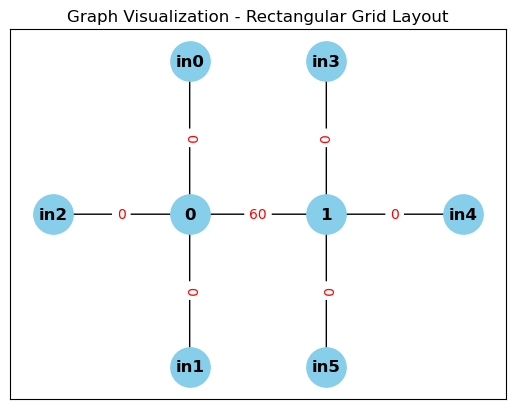

Images combined and saved as 'plots/memory_based/combined/Intersection0.png'


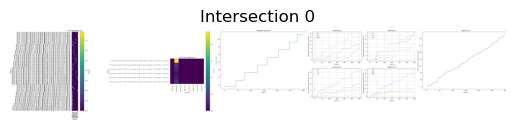

Images combined and saved as 'plots/memory_based/combined/Intersection1.png'


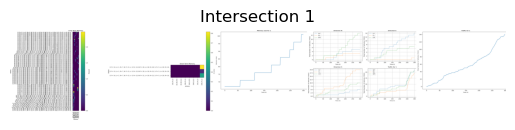

W: total average weight time per lane: 32.86911945024663s
average weight time per node in s (nan means no cars arrived):
 {'0': 34.283704889465014, '1': 31.468334844581573}
Total arriving cars: 128


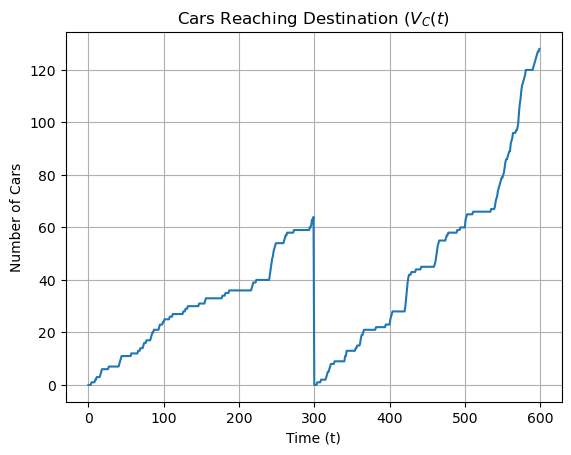

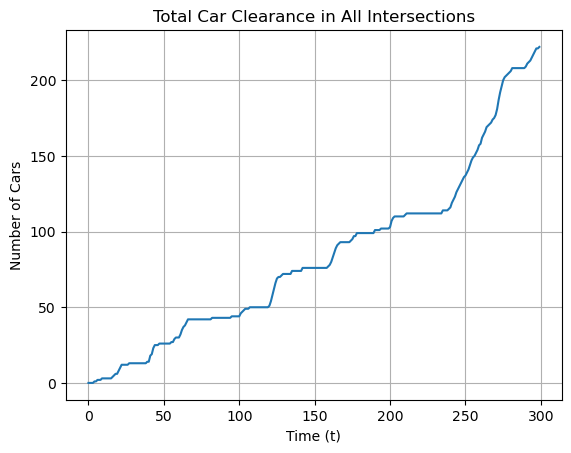

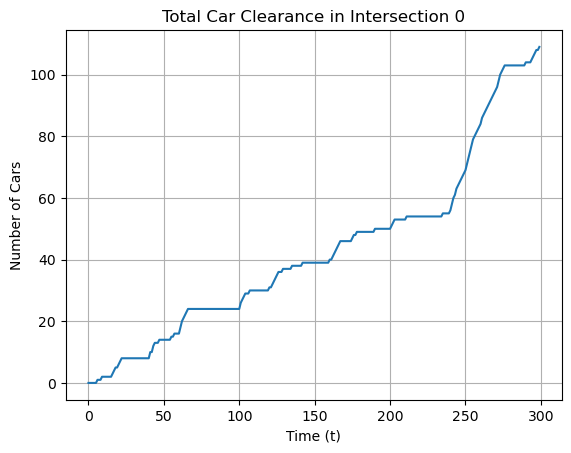

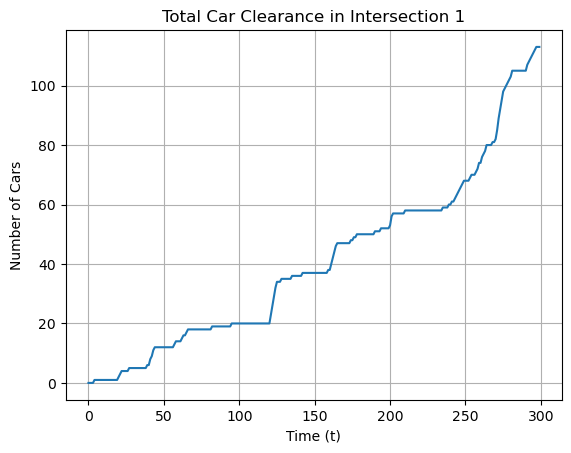

In [7]:
test_graph.set_memory_based(is_mem_based=True)

env_SARSA.test(test_graph=test_graph, test_vehicles=test_vehicles, update_epoch = 25)
env_SARSA.plot_env()
env_SARSA.display_congestion_metric()

W: total average weight time per lane: 28.898286071518225s
average weight time per node in s (nan means no cars arrived):
 {'0': 27.485822813982644, '1': 30.26497505681886}
Total arriving cars: 128


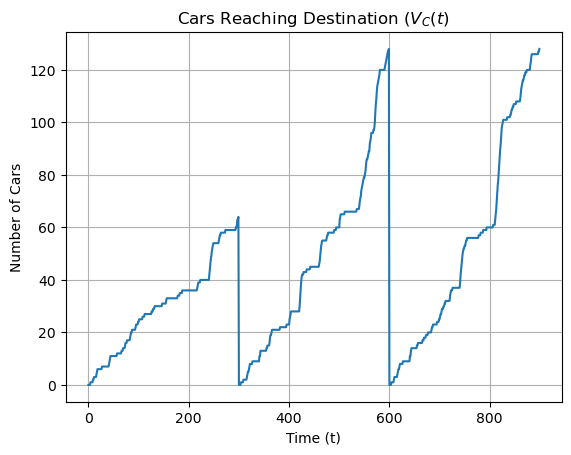

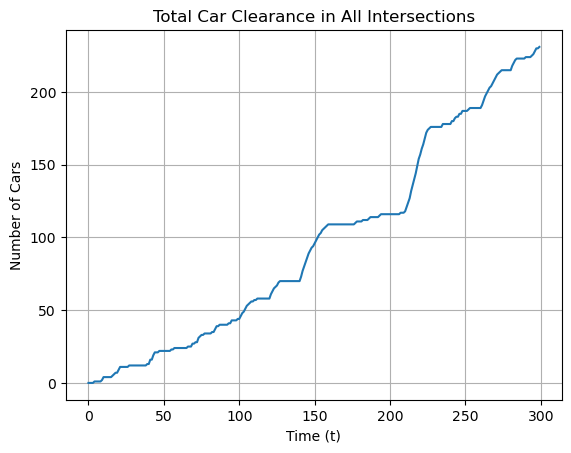

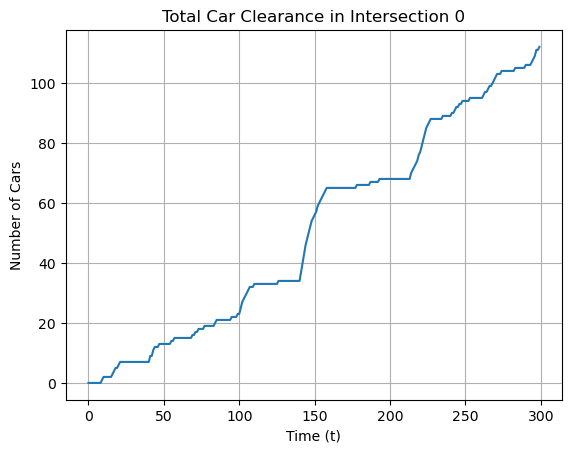

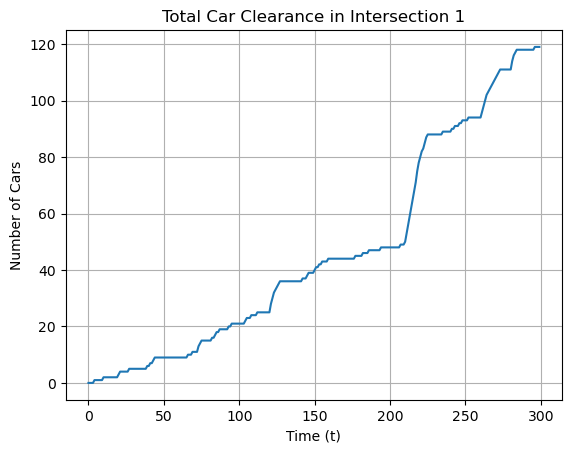

In [8]:
test_graph.set_memory_based(is_mem_based=True)

env_SARSA.test(test_graph=test_graph, test_vehicles=test_vehicles, update_epoch = 25)
# env_SARSA.plot_env()
env_SARSA.display_congestion_metric()

In [9]:
a = pd.DataFrame({'a':[1,3,2,1], 'b': [1,1,1,1]})
b = pd.DataFrame({'a':[11,13,12,21], 'b': [121,12,121,14]})
a['state'] = a.index
b['state'] = b.index

NameError: name 'pd' is not defined

In [ ]:
a.set_index('state')
a.index.name

In [ ]:
c = pd.merge(a, b, on = 'state', how = 'inner', suffixes = ['', '_old'])
c.loc[:, ~c.columns.str.endswith('_old')]

,a,b,state
0,1,1,0
1,3,1,1
2,2,1,2
3,1,1,3


In [ ]:
a['state'].apply(lambda x: x+1)

0    1
1    2
2    3
3    4
Name: state, dtype: int64

In [ ]:
a

,a,b,state
0,1,1,0
1,3,1,1
2,2,1,2
3,1,1,3


In [ ]:
import numpy as np
b = np.array([0, 0, 0, 0])

In [ ]:
c = '-'.join(b.astype(str))

In [ ]:
np.array(c.split('-')).astype(int)

array([0, 0, 0, 0])

In [7]:
import numpy as np
import pickle

In [20]:
np.load('metrics/run_2_2/total_arriving_2_2_mem_False_comm_False.npy')

array([[ 0,  0,  0, ..., 63, 63, 64],
       [ 0,  0,  0, ..., 65, 65, 65],
       [ 0,  0,  0, ..., 47, 47, 47],
       ...,
       [ 0,  1,  1, ..., 84, 84, 84],
       [ 0,  0,  0, ..., 54, 55, 55],
       [ 0,  0,  0, ..., 64, 64, 64]])

In [22]:
np.load('metrics/run_2_2/total_waiting_time_2_2_mem_False_comm_False.npy')

array([ 6.72317383,  4.97602586,  2.92053095,  0.92072225, 15.56875108,
        4.11779999, 33.50838176, 19.69585537, 26.85128996, 17.31910839,
       14.08807554,  9.00587738,  9.78784639, 10.02854196, 17.17972506,
        7.11068218, 19.92760156, 27.94230644,  0.67587487,  0.46219805,
       12.68627442,  8.17296865,  9.99902439, 14.85604141, 33.8734433 ,
        3.87395815, 17.57010277, 15.64682163,  4.76928444,  2.38393791])

In [23]:
np.load('metrics/run_2_2/total_clearance_2_2_mem_False_comm_False.npy')

array([[  0.,   0.,   0., ..., 113., 113., 114.],
       [  0.,   0.,   0., ..., 116., 116., 116.],
       [  0.,   0.,   1., ...,  95.,  95.,  95.],
       ...,
       [  0.,   1.,   1., ..., 156., 156., 156.],
       [  0.,   0.,   0., ..., 112., 114., 114.],
       [  0.,   0.,   0., ..., 118., 118., 118.]])

In [16]:
with open('metrics/run_2_2/node_clearance_2_2_mem_False_comm_False.pickle', 'rb') as f:
    a = pickle.load(f)
a

{'0': [array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,
          1,  1,  1,  1,  3,  5,  7,  8,  9, 10, 10, 10, 10, 10, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
         14, 14, 14, 14, 14, 15, 15, 16, 16, 16, 17, 17, 18, 18, 18, 18, 18,
         18, 19, 20, 20, 21, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
         23, 23, 24, 24, 24, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27]),
  array([ 0,  1,  1,  2,  2,  3,  3,  3,  3,  4,  4,  7,  8,  8,  8,  8,  8,
          8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
         12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
         13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 16, 16, 16, 16,
         16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18])],
 '1': [array([ 0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,


In [17]:
with open('metrics/run_2_2/node_waiting_time_2_2_mem_False_comm_False.pickle', 'rb') as f:
    a = pickle.load(f)
a

{'0': [2.082403569846173, 0.8942208574744914],
 '1': [2.1337229876843318, 0.877133152713729]}